In [112]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [124]:
filename = 'data/data/train.json'
with open(filename, "rt") as fp:
    train_config = json.load(fp)

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: fp
  warnings.warn(message)


In [125]:
train_config[1]

{'nums': [{'box': [[794, 661], [1004, 618], [1009, 670], [799, 717]],
   'text': 'M938OX116'},
  {'box': [[944, 268], [995, 267], [994, 283], [942, 283]],
   'text': 'H881OA116'}],
 'file': 'train/1.jpg'}

In [126]:
def draw_landmarks(image, landmarks):
    for point in landmarks:
        x, y = point.astype(np.int)
        cv2.circle(image, (x, y), 3, (255, 0, 0), 3, -1)
    return image

In [144]:
def plot_image(image_file_name, landamrks, mask_file_name=None):
    plt.figure(figsize=(20, 10))

    # image
    plt.subplot(1, 2, 1)
    image = cv2.imread(image_file_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landamrks)
    plt.imshow(image)

    # mask
    image_base, ext = os.path.splitext(image_file_name)
    mask_file_name = f"{image_base}.mask{ext}"
    plt.subplot(1, 2, 2)
    mask = cv2.imread(mask_file_name)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    plt.imshow(mask)

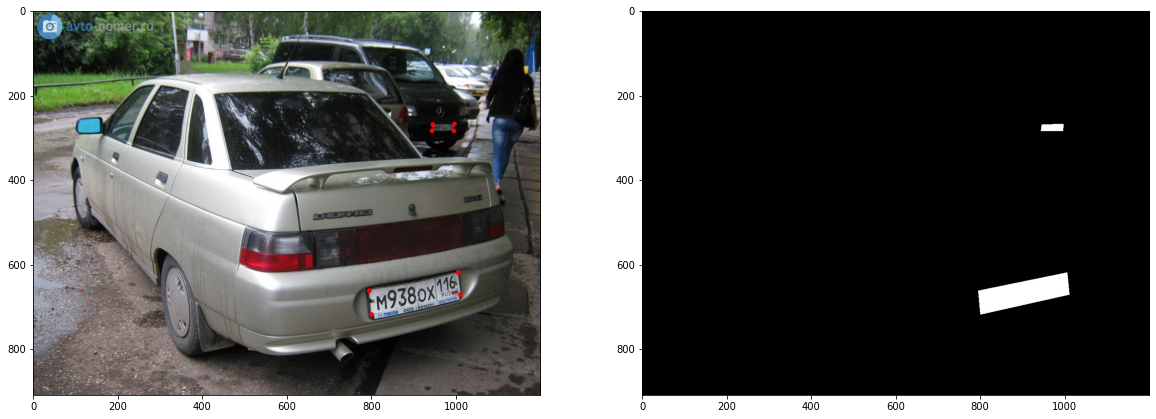

In [145]:
i = 1
image_file_name = os.path.join('data/data', train_config[i]['file'])
landamrks = np.vstack([grz['box'] for grz in train_config[i]['nums']])
plot_image(image_file_name, landamrks)

# Черновик

In [ ]:
from argparse import Namespace
request = Namespace(
    name='message',
    data='path to data',
    crop_size=32,
    batch_size=32,
    epochs=3,
    learning_rate=0.001,
    gpu=False,
    worker=1 # worker=0 - худший результат, worker=1, 2 ... 4 примерно одинаковый результат
)

In [ ]:
request.__dict__

In [ ]:
np.asarray((0.5, 0.5, 0.5)).reshape((1, 1, 3))